#### *Import Libraries & Download NLTK Resources*

In [ ]:

import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.font_manager as fm

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### *Load Data*

In [45]:
# Load CSV
data = pd.read_csv('../scopus.csv')

#### *Inspect Data*

In [ ]:
print(data['Abstract'])         # Inspect sample abstracts


#### ***Text Preprocessing***

In [48]:
def advanced_text_preprocess(
    text, 
    lowercase=True, 
    remove_punctuation=True, 
    remove_numbers=True, 
    remove_stopwords=True, 
    lemmatize=True
):
    """
    Advanced text preprocessing function with configurable options
    
    Parameters:
    - text: Input text string
    - lowercase: Convert text to lowercase
    - remove_punctuation: Remove punctuation marks
    - remove_numbers: Remove numeric characters
    - remove_stopwords: Remove common stopwords
    - lemmatize: Apply lemmatization
    
    Returns:
    Preprocessed text string
    """
    # Ensure text is a string and not NaN
    if not isinstance(text, str):
        return ''
    
    # Lowercase conversion
    if lowercase:
        text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove punctuation
    if remove_punctuation:
        text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    if remove_numbers:
        text = re.sub(r'\d+', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Return processed tokens as a string
    return ' '.join(tokens)


#### *Apply **Preprocessing** to Abstracts*

In [49]:
# Basic usage
data['Processed_Abstract'] = data['Abstract'].apply(advanced_text_preprocess)

# Customized preprocessing
data['Custom_Processed'] = data['Abstract'].apply(
    lambda x: advanced_text_preprocess(
        x, 
        lowercase=True, 
        remove_numbers=False, 
        lemmatize=True
    )
)

#### *Processed Results*

In [50]:
selected_columns = data[['Abstract', 'Processed_Abstract']]
selected_columns.head(20)

,Abstract,Processed_Abstract
0,This study evaluates the effectiveness of AI-d...,study evaluates effectiveness aidriven technol...
1,This study investigates how U.S. college stude...,study investigates u college student n perceiv...
2,Suicide remains a pressing global public healt...,suicide remains pressing global public health ...
3,"ChatGPT, a sophisticated artificial intelligen...",chatgpt sophisticated artificial intelligence ...
4,Willingness to communicate (WTC) has been iden...,willingness communicate wtc identified crucial...
5,Background: The past decade has witnessed a su...,background past decade witnessed surge develop...
6,Virtual reality (VR) with augmented reality (A...,virtual reality vr augmented reality ar drasti...
7,Generative artificial intelligence systems bas...,generative artificial intelligence system base...
8,Artificial intelligence (AI) can generate high...,artificial intelligence ai generate highqualit...
9,This article examines the incorporation of Ein...,article examines incorporation einsteinian phy...


#### *Wordcloud*

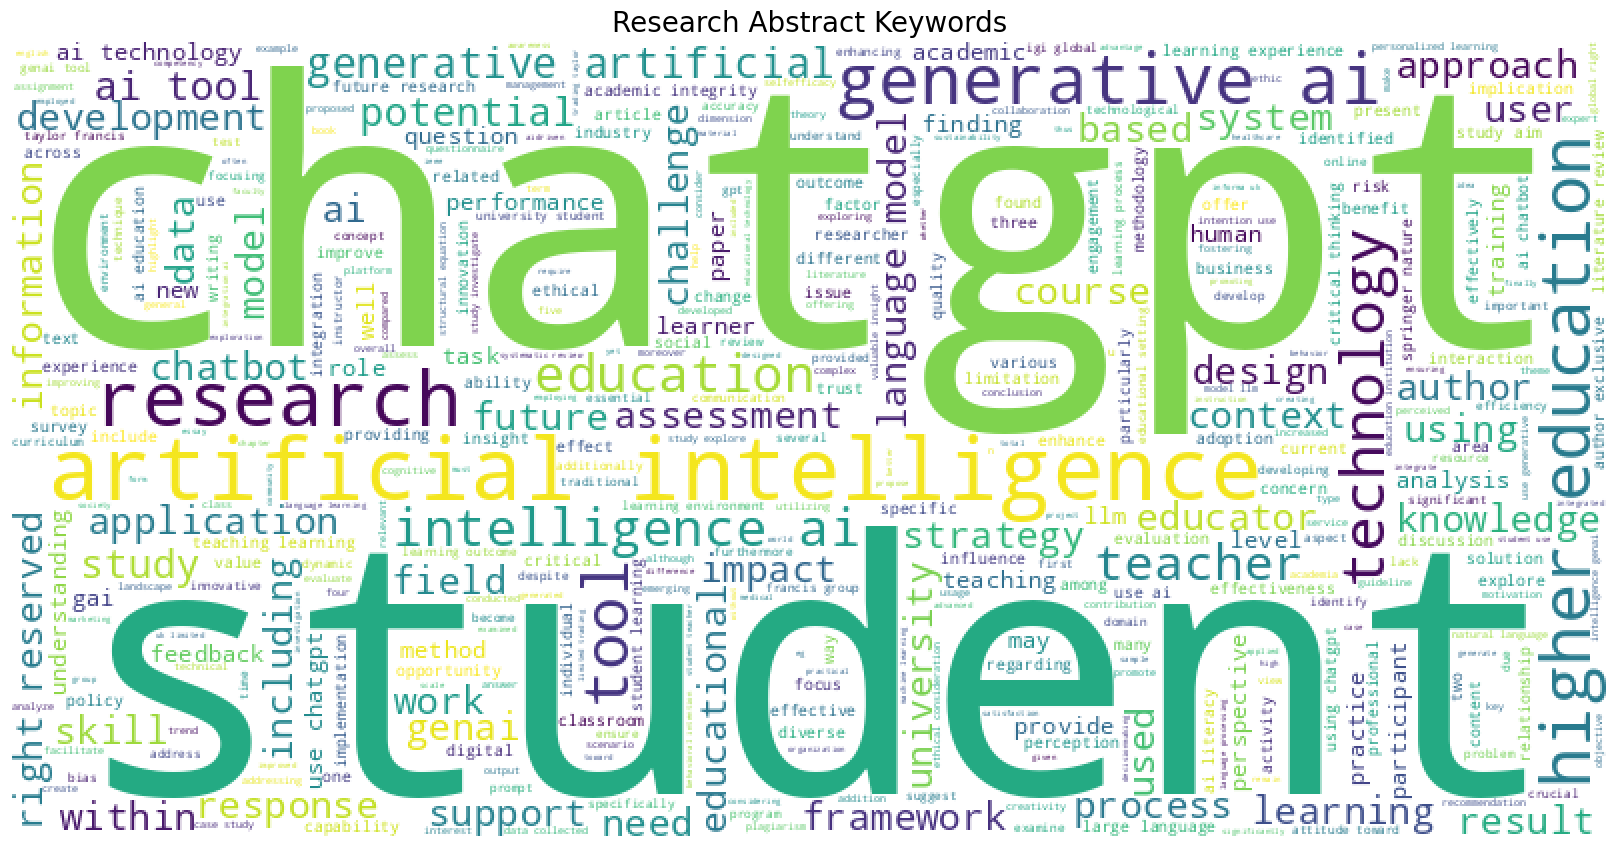

In [51]:

def generate_wordcloud(text_series, title='Word Cloud', max_words=10000, background_color='white'):
    """
    Generate a word cloud from a pandas Series of text
    
    Parameters:
    - text_series: Pandas Series containing processed text
    - title: Title of the word cloud
    - max_words: Maximum number of words to display
    - background_color: Background color of the word cloud
    """

    # Combine all text into a single string
    text = ' '.join(text_series.dropna())
    
    # Create WordCloud object
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color=background_color, 
        max_words=max_words,
        stopwords = STOPWORDS,
        colormap='viridis'  
    ).generate(text)
    
    # Create the plot
    plt.figure(figsize=(16,10), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title(title, fontsize=20)
    plt.show()


generate_wordcloud(data['Processed_Abstract'], title='Research Abstract Keywords')

#### *Import Libraries*

In [ ]:
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### ***Bag-of-Words***
(Represents text as a vector of word counts, ignoring grammar and word order.)

In [ ]:
# Create Bag of Words representation
bow_vectorizer = CountVectorizer(max_features=1000)
bow_features = bow_vectorizer.fit_transform(data['Processed_Abstract'])

# Convert to DataFrame for easier viewing
bow_df = pd.DataFrame(
    bow_features.toarray(), 
    columns=bow_vectorizer.get_feature_names_out()
)

print(bow_df)

      ability  able  abstract  academia  academic  acceptance  access  \
0           1     0         0         0         0           0       0   
1           0     0         0         0         1           0       0   
2           1     0         0         0         0           0       0   
3           0     0         0         0         1           0       0   
4           0     0         0         0         0           0       0   
...       ...   ...       ...       ...       ...         ...     ...   
2520        0     1         0         1         0           0       0   
2521        0     0         1         0         0           0       0   
2522        0     0         0         0         0           0       0   
2523        0     0         0         0         0           0       0   
2524        0     0         0         0         0           0       0   

      accessibility  according  accuracy  ...  word  work  working  workplace  \
0                 0          0         0  

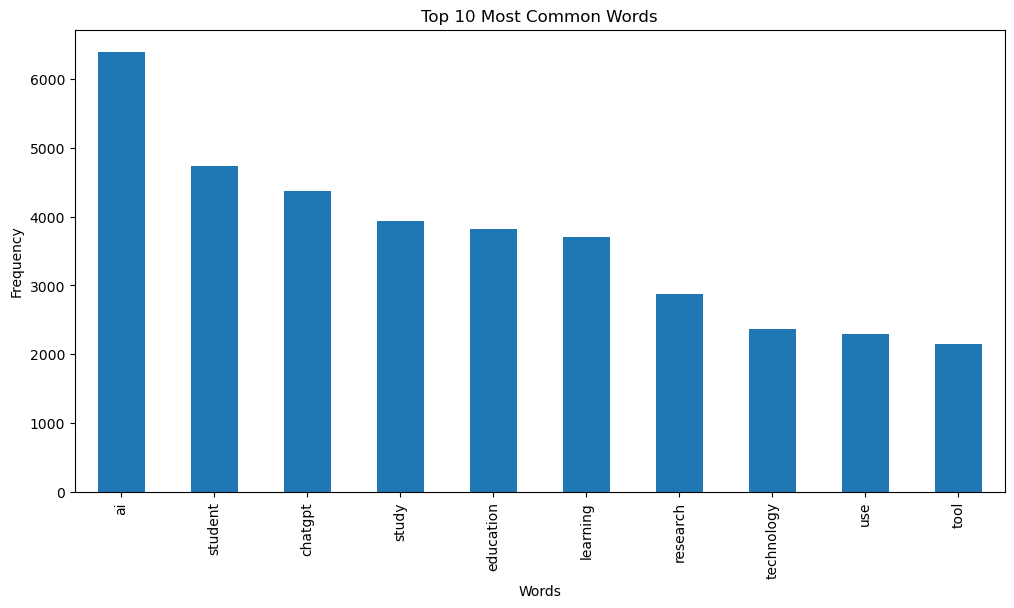

In [54]:
# Sum up the counts of each word
sum_words = bow_df.sum(axis=0)

# Sort and select top 10 words
sorted_words = sum_words.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(12, 6))
sorted_words.plot(kind='bar')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### ***TF-IDF***
(Statistical measure that evaluates the importance of a word in a document relative to a collection of documents (corpus).

In [55]:
# Create TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(data['Processed_Abstract'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(
    tfidf_features.toarray(), 
    columns=tfidf_vectorizer.get_feature_names_out()
)



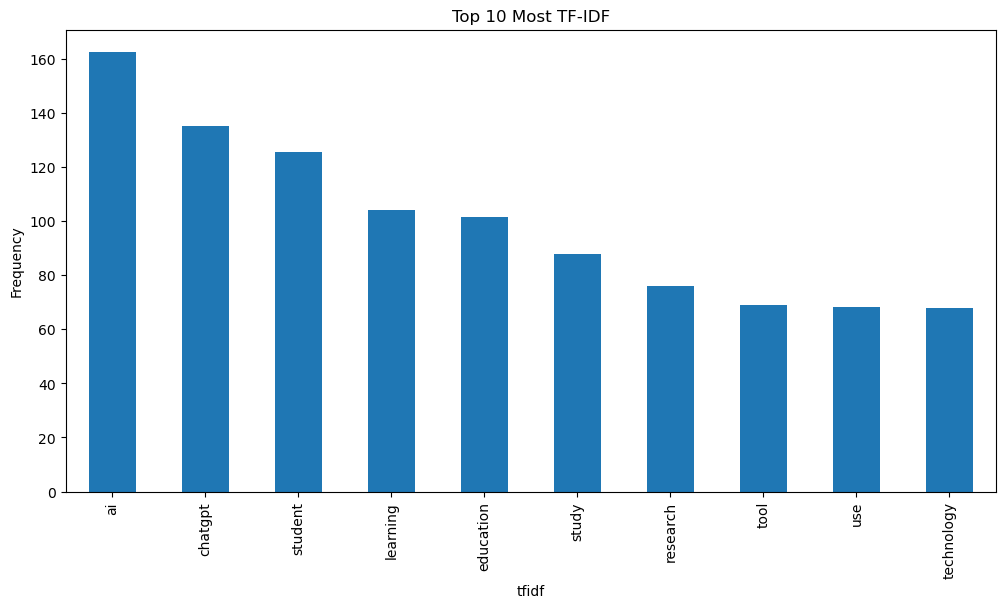

In [56]:
# Sum up the counts of each bigram
sum_tfidf = tfidf_df.sum(axis=0)

# Sort and select top 10 bigrams
sorted_tfidf = sum_tfidf.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(12, 6))
sorted_tfidf.plot(kind='bar')
plt.title('Top 10 Most TF-IDF')
plt.xlabel('tfidf')
plt.ylabel('Frequency')
plt.show()

### ***N-Grams***
(Generate N-Grams to analyze word combinations in the abstracts)

In [57]:
ngram_vectorizer = CountVectorizer(
    ngram_range=(2, 2),  # Include unigrams and bigrams
    max_features=1000
)
ngram_features = ngram_vectorizer.fit_transform(data['Processed_Abstract'])

ngram_df = pd.DataFrame(ngram_features.toarray(), columns=ngram_vectorizer.get_feature_names_out())


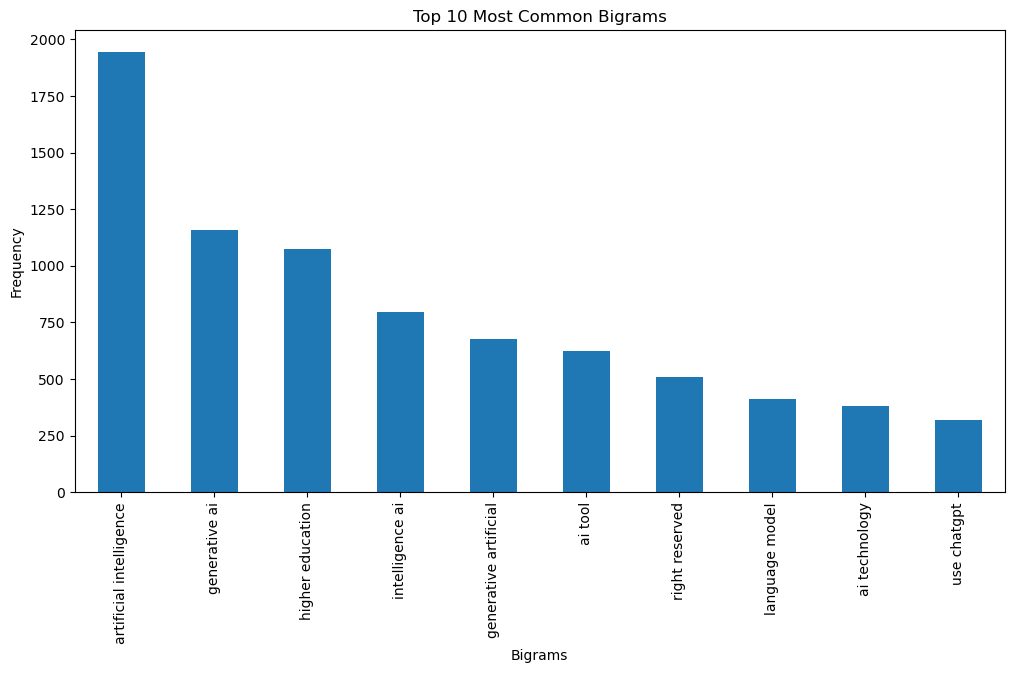

In [58]:
# Sum up the counts of each bigram
sum_bigrams = ngram_df.sum(axis=0)

# Sort and select top 10 bigrams
sorted_bigrams = sum_bigrams.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(12, 6))
sorted_bigrams.plot(kind='bar')
plt.title('Top 10 Most Common Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.show()


#### ***Part Of Speech Tagging***
(Label each token with its grammatical category)

In [ ]:
# Function to tag POS in a sentence
def pos_tag_sentence(sentence):
    tokens = word_tokenize(sentence)
    return pos_tag(tokens)

# Apply POS tagging to each cleaned abstract
data['POS_Tagged_Abstract'] = data['Processed_Abstract'].apply(pos_tag_sentence)

# Display the DataFrame
#print(data[['Processed_Abstract', 'POS_Tagged_Abstract']].head())


                                  Processed_Abstract  \
0  study evaluates effectiveness aidriven technol...   
1  study investigates u college student n perceiv...   
2  suicide remains pressing global public health ...   
3  chatgpt sophisticated artificial intelligence ...   
4  willingness communicate wtc identified crucial...   

                                 POS_Tagged_Abstract  
0  [(study, NN), (evaluates, VBZ), (effectiveness...  
1  [(study, NN), (investigates, VBZ), (u, JJ), (c...  
2  [(suicide, NN), (remains, VBZ), (pressing, VBG...  
3  [(chatgpt, NN), (sophisticated, JJ), (artifici...  
4  [(willingness, NN), (communicate, NN), (wtc, N...  


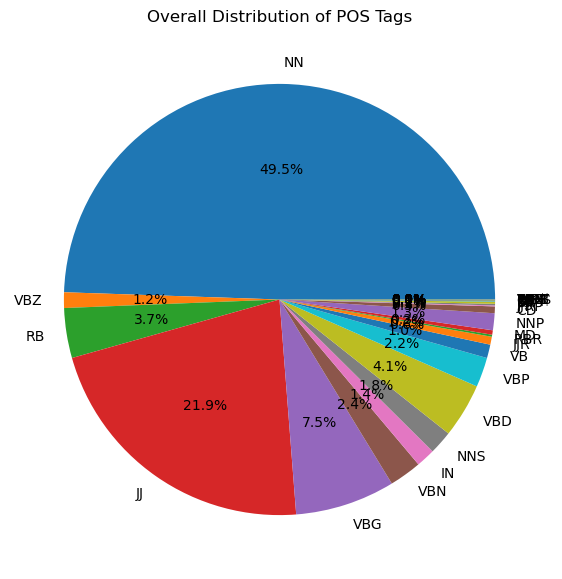

In [75]:
import matplotlib.pyplot as plt
from collections import Counter
import itertools

# Flatten the list of all POS tags from all abstracts
all_tags = list(itertools.chain.from_iterable(data['POS_Tagged_Abstract'].apply(lambda x: [tag for word, tag in x])))

# Count the frequency of each POS tag
tag_freq = Counter(all_tags)

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(tag_freq.values(), labels=tag_freq.keys(), autopct='%1.1f%%')
plt.title('Overall Distribution of POS Tags')
plt.show()


#### ***Another Advanced Features:***
- ***Word Count***: The total number of words in the text.
- ***Unique Word Count:*** The number of unique words in the text.
- ***Average Word Length***: The average length of words in the text.
- ***Text Complexity***: The ratio of the total text length to the number of words.
- ***Word Length Standard Deviation***: The standard deviation of word lengths, indicating word length variation.
- ***Vocabulary Richness***: The ratio of unique words to total words, indicating lexical diversity.


In [76]:
def enhanced_advanced_features(text):
    words = text.split()
    if not words:
        return {
            'word_count': 0,
            'unique_word_count': 0,
            'avg_word_length': 0,
            'text_complexity': 0,
            'word_length_std': 0,
            'vocabulary_richness': 0
        }
    
    return {
        'word_count': len(words),
        'unique_word_count': len(set(words)),
        'avg_word_length': np.mean([len(word) for word in words]),
        'text_complexity': len(text) / len(words),
        'word_length_std': np.std([len(word) for word in words]),  # Word length variation
        'vocabulary_richness': len(set(words)) / len(words)  # Lexical diversity ratio
    }

# Apply advanced feature extraction
advanced_features = data['Processed_Abstract'].apply(enhanced_advanced_features).apply(pd.Series)


#### ***Vizualization***:

***Word Count Distribution*** - A histogram showing the distribution of the total number of words in the abstracts.

***Unique vs Total Words*** - A scatter plot comparing the number of unique words to the total number of words.

***Average Word Length Distribution*** - A histogram showing the distribution of the average word length.

***Text Complexity Distribution*** - A histogram showing the distribution of text complexity.

***Vocabulary Richness*** - A histogram showing the distribution of vocabulary richness.

***Word Length Variation*** - A histogram showing the distribution of the standard deviation of word lengths.

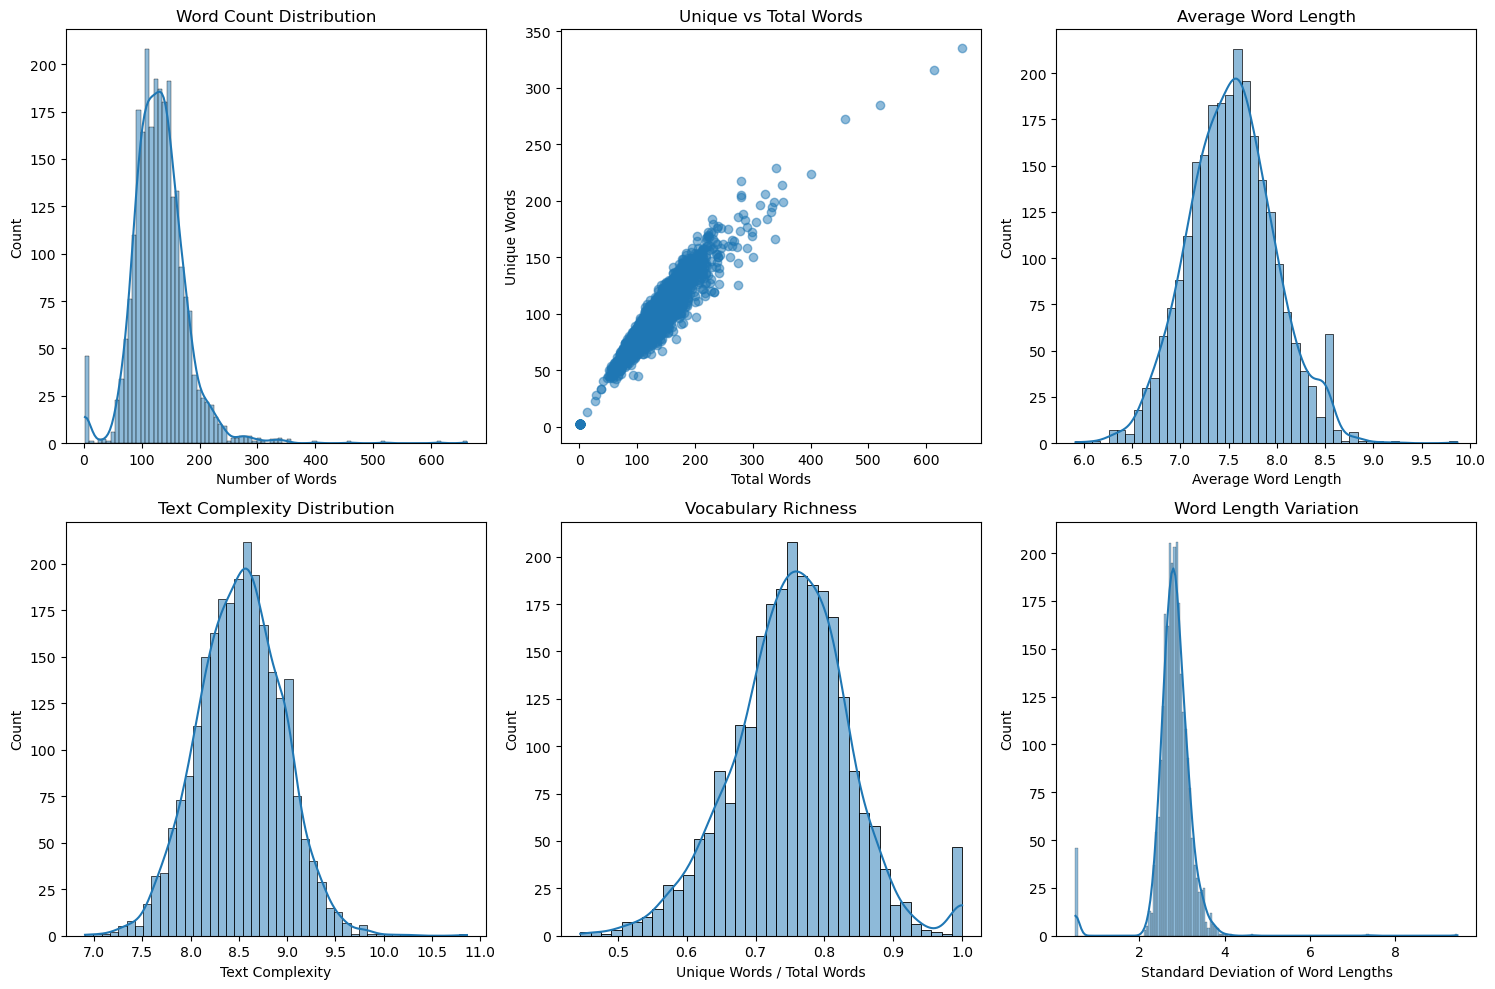

        word_count  unique_word_count  avg_word_length  text_complexity  \
count  2525.000000        2525.000000      2525.000000      2525.000000   
mean    131.208317          96.278812         7.532479         8.515245   
std      47.832730          29.671256         0.448834         0.434328   
min       2.000000           2.000000         5.913333         6.906667   
25%     103.000000          79.000000         7.227642         8.219178   
50%     128.000000          94.000000         7.532110         8.523077   
75%     154.000000         113.000000         7.819048         8.810000   
max     662.000000         335.000000         9.870370        10.861111   

       word_length_std  vocabulary_richness  
count      2525.000000          2525.000000  
mean          2.806819             0.752397  
std           0.451820             0.085055  
min           0.500000             0.445545  
25%           2.640699             0.701923  
50%           2.813657             0.754545  
75

In [ ]:
# Create visualizations
plt.figure(figsize=(15,10))

# 1. Distribution of Word Count
plt.subplot(2, 3, 1)
sns.histplot(advanced_features['word_count'], kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')

# 2. Unique Word +Count vs Total Word Count
plt.subplot(2, 3, 2)
plt.scatter(advanced_features['word_count'], advanced_features['unique_word_count'], alpha=0.5)
plt.title('Unique vs Total Words')
plt.xlabel('Total Words')
plt.ylabel('Unique Words')

# 3. Average Word Length Distribution
plt.subplot(2, 3, 3)
sns.histplot(advanced_features['avg_word_length'], kde=True)
plt.title('Average Word Length')
plt.xlabel('Average Word Length')

# 4. Text Complexity Distribution
plt.subplot(2, 3, 4)
sns.histplot(advanced_features['text_complexity'], kde=True)
plt.title('Text Complexity Distribution')
plt.xlabel('Text Complexity')

# 5. Vocabulary Richness
plt.subplot(2, 3, 5)
sns.histplot(advanced_features['vocabulary_richness'], kde=True)
plt.title('Vocabulary Richness')
plt.xlabel('Unique Words / Total Words')

# 6. Word Length Standard Deviation
plt.subplot(2, 3, 6)
sns.histplot(advanced_features['word_length_std'], kde=True)
plt.title('Word Length Variation')
plt.xlabel('Standard Deviation of Word Lengths')

plt.tight_layout()
plt.show()

# Additional statistical summary
#print(advanced_features.describe())